In [1]:
import runner
import utils
import dataset
import dataclasses
import matlab.engine
import lstm_model
import reference_impl

In [2]:
cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=32,
    num_subcarriers=80,
    train_test_split=0.8,
    data_root="../data/dataset2",
    reduce_pca_overhead=False,
    epochs=10,
    compression_rate_dct=0.6,
    predictor_window_size = 5,
    total_bits=512,
    train_snr=10, #in linear
    test_snr=10, #in linear
    results_save_path=f"../results/trainsnr{10}_testsnr{10}_windowsize{5}",
    compressor_type="kmeans",
    preprocessor_type="real_imag",
    trunc_lstm_pred=20
    # duplicate_data=1,
    # data_snr=-1
)

matlab = matlab.engine.start_matlab()

dataset.combine_time_series_paths(
    cfg.data_root,
    list(range(32)),
    2.5e9,
    "train_set.pickle"
)
dataset.combine_time_series_paths(
    cfg.data_root,
    list(range(33,40)),
    2.62e9,
    "test_set.pickle"
)

Saving files to  ../data/dataset2\train_set.pickle
Number of samples (13865, 1, 32, 1, 80)
Saving files to  ../data/dataset2\test_set.pickle
Number of samples (3086, 1, 32, 1, 80)


In [3]:
possible_bits = [16,32,64,128,256,512, 1024,1536,2048]
for btot in possible_bits:
    this_cfg = dataclasses.replace(cfg, total_bits=btot)

    runner.run_model(
        this_cfg,
        matlab,
        lstm_model.FullLSTMModel,
        "lstm",
        # simulation=True
    )

    runner.run_reference_model(
        this_cfg,
        matlab,
        reference_impl.FullReferenceModel,
        "reference"
    )



Running Model lstm, btot 16, pred_size 5
Noise is added to the test and train samples train snr 10 in linear , test snr 10 in linear
(13860, 1)
(13860, 32, 80)
(3081, 1)
(3081, 32, 80)
This is the LSTM
Fitting the PCA


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500


  0%|          | 0/12 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


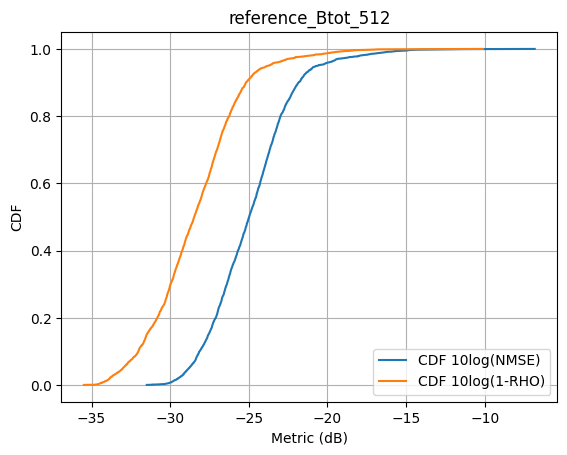

Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


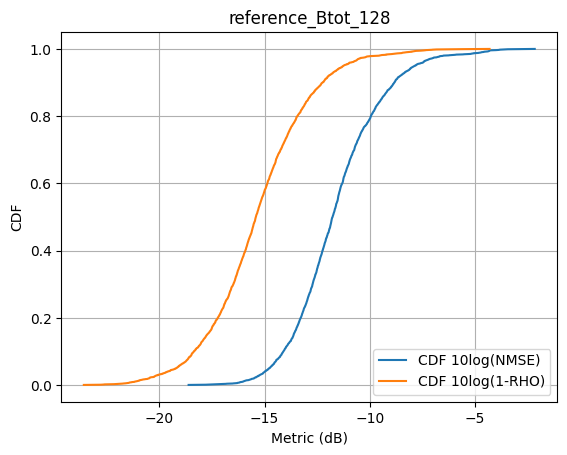

In [1]:
# import utils
# import matlab.engine
# import dataclasses
# import runner
# import reference_impl
# 
# cfg = utils.Config(
#     num_rx_antennas=1,
#     num_tx_antennas=32,
#     num_subcarriers=80,
#     train_test_split=0.8,
#     data_root="../data/dataset2",
#     reduce_pca_overhead=False,
#     epochs=10,
#     compression_rate_dct=0.6,
#     predictor_window_size = 5,
#     total_bits=512,
#     results_save_path="../results",
#     compressor_type="kmeans",
#     preprocessor_type="real_imag",
#     trunc_lstm_pred=20
#     # duplicate_data=1,
#     # data_snr=-1
# )
# 
# matlab = matlab.engine.start_matlab()
# possible_bits = [128]
# 
# for btot in possible_bits:
#     this_cfg = dataclasses.replace(cfg, total_bits=btot)
# 
#     # runner.run_model(
#     #     this_cfg,
#     #     matlab,
#     #     reference_impl.FullReferenceModel,
#     #     "reference"
#     # )
#     
#     runner.run_reference_model(
#         this_cfg,
#         matlab,
#         reference_impl.FullReferenceModel,
#         "reference"
#     )

